In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import datetime
from datetime import datetime, timedelta


In [62]:
from google.colab import files
data= files.upload()

Saving QVI_transaction_data.csv to QVI_transaction_data (1).csv


In [63]:
from google.colab import files
data_2= files.upload()

Saving QVI_purchase_behaviour.csv to QVI_purchase_behaviour (1).csv


In [64]:
df_1= pd.read_csv('QVI_transaction_data.csv')
df_2= pd.read_csv('QVI_purchase_behaviour.csv')

In [5]:
df_1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
df_2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DATE             264836 non-null  int64  
 1   STORE_NBR        264836 non-null  int64  
 2   LYLTY_CARD_NBR   264836 non-null  int64  
 3   TXN_ID           264836 non-null  int64  
 4   PROD_NBR         264836 non-null  int64  
 5   PROD_NAME        264836 non-null  object 
 6   PROD_QTY         264836 non-null  int64  
 7   TOT_SALES        264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [148]:
chips_df = df_1[df_1['PROD_NAME'].str.contains('Chips', case=False)]
chips_df['PROD_NAME'].unique()


['Smiths Crinkle Cut  Chips Chicken 170g', 'Smiths Crinkle Chips Salt & Vinegar 330g', 'Thins Chips Light&  Tangy 175g', 'Thins Chips         Originl saltd 175g', 'Thins Chips Seasonedchicken 175g', ..., 'WW Original Stacked Chips 160g', 'Thins Chips Salt &  Vinegar 175g', 'Smiths Crinkle Cut  Chips Barbecue 170g', 'WW Supreme Cheese   Corn Chips 200g', 'WW Sour Cream &OnionStacked Chips 160g']
Length: 21
Categories (114, object): ['Burger Rings 220g', 'CCs Nacho Cheese    175g', 'CCs Original 175g',
                           'CCs Tasty Cheese    175g', ..., 'WW Supreme Cheese   Corn Chips 200g',
                           'Woolworths Cheese   Rings 190g', 'Woolworths Medium   Salsa 300g',
                           'Woolworths Mild     Salsa 300g']

Products focusing only on chips

In [66]:
df_1['PROD_NAME']=df_1['PROD_NAME'].astype('category')


In [65]:
# Ensure the 'DATE' column is in datetime format
df_1['DATE'] = df_1['DATE'].astype(np.int64)
df_1['ORDER_DATE'] = df_1['DATE'].apply(lambda x: datetime(1899, 12, 30) + timedelta(days=x))
df_1.drop('DATE',axis=1,inplace=True)

In [67]:
cols = df_1.columns.tolist()

cols.insert(0, cols.pop(cols.index('ORDER_DATE')))  # Remove and insert at index 1

# Apply new order
df_1 = df_1[cols]

# View updated DataFrame
df_1.head()


,ORDER_DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [68]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ORDER_DATE       264836 non-null  datetime64[ns]
 1   STORE_NBR        264836 non-null  int64         
 2   LYLTY_CARD_NBR   264836 non-null  int64         
 3   TXN_ID           264836 non-null  int64         
 4   PROD_NBR         264836 non-null  int64         
 5   PROD_NAME        264836 non-null  category      
 6   PROD_QTY         264836 non-null  int64         
 7   TOT_SALES        264836 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(5)
memory usage: 14.4 MB


In [69]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [70]:
cat_col=['LIFESTAGE',"PREMIUM_CUSTOMER"]
for col in cat_col:
  df_2[col]=df_2[col].astype('category')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   LYLTY_CARD_NBR    72637 non-null  int64   
 1   LIFESTAGE         72637 non-null  category
 2   PREMIUM_CUSTOMER  72637 non-null  category
dtypes: category(2), int64(1)
memory usage: 710.0 KB


In [71]:
df_1.shape

(264836, 8)

In [72]:
df_1.isna().sum()

,0
ORDER_DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


No null values

In [73]:
df_2.isna().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [74]:
# checking unique entitites
for col in df_1.columns:
  print(col, "=", df_1[col].nunique())

ORDER_DATE = 364
STORE_NBR = 272
LYLTY_CARD_NBR  = 72637
TXN_ID = 263127
PROD_NBR = 114
PROD_NAME = 114
PROD_QTY = 6
TOT_SALES = 112


In [75]:
for col in df_2.columns:
  print(col, "=", df_2[col].nunique())

LYLTY_CARD_NBR = 72637
LIFESTAGE = 7
PREMIUM_CUSTOMER = 3


In [76]:
df_1.head()

,ORDER_DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Statistical Summary of the data

In [77]:
df_1.describe()

,ORDER_DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [78]:
df_1.columns = df_1.columns.str.strip()
df_2.columns = df_2.columns.str.strip()


In [79]:
print(df_1.columns)
print(df_2.columns)


Index(['ORDER_DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')
Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')


In [80]:
df_1.rename(columns={'LYLTY_CARD_NBR': 'CARD_NBR'}, inplace=True)
# Rename the column in df_2 to match df_1
df_2.rename(columns={'LYLTY_CARD_NBR': 'CARD_NBR'}, inplace=True)

# Now merge df_1 and df_2 on the common column 'CARD_NBR'
df = pd.merge(df_1, df_2, on='CARD_NBR')
df.head(10)


,ORDER_DATE,STORE_NBR,CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,MIDAGE SINGLES/COUPLES,Budget


Creating different features from date,prod_name

In [81]:
# features from date
df['ORDER_YEAR']=df['ORDER_DATE'].dt.year
df['ORDER_MONTH']=df['ORDER_DATE'].dt.strftime('%B')


In [82]:
df.head(10)

,ORDER_DATE,STORE_NBR,CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,ORDER_YEAR,ORDER_MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018,October
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019,May
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,2019,May
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,2018,August
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,2018,August
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,2019,May
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,2019,May
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,MIDAGE SINGLES/COUPLES,Budget,2019,May
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget,2018,August
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,MIDAGE SINGLES/COUPLES,Budget,2018,August


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ORDER_DATE        264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   CARD_NBR          264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  category      
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  category      
 9   PREMIUM_CUSTOMER  264836 non-null  category      
 10  ORDER_YEAR        264836 non-null  int32         
 11  ORDER_MONTH       264836 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int32(1), int64(5), object(1)
memory usage: 17.9+ MB


In [84]:
df.describe()

,ORDER_DATE,STORE_NBR,CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,ORDER_YEAR
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,2018.495193
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,2018.000000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,2018.000000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,2018.000000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,2019.000000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,2019.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,0.499978


In [85]:
df.nunique()

,0
ORDER_DATE,364
STORE_NBR,272
CARD_NBR,72637
TXN_ID,263127
PROD_NBR,114
PROD_NAME,114
PROD_QTY,6
TOT_SALES,112
LIFESTAGE,7
PREMIUM_CUSTOMER,3


In [86]:
df['LIFESTAGE'].value_counts()

,count
LIFESTAGE,
OLDER SINGLES/COUPLES,54479
RETIREES,49763
OLDER FAMILIES,48596
YOUNG FAMILIES,43592
YOUNG SINGLES/COUPLES,36377
MIDAGE SINGLES/COUPLES,25110
NEW FAMILIES,6919


In [87]:
df['PROD_NAME'].value_counts()

,count
PROD_NAME,
Kettle Mozzarella Basil & Pesto 175g,3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
Tyrrells Crisps Ched & Chives 165g,3268
Cobs Popd Sea Salt Chips 110g,3265
...,...
RRD Pc Sea Salt 165g,1431
Woolworths Medium Salsa 300g,1430
NCC Sour Cream & Garden Chives 175g,1419


In [88]:
df['PREMIUM_CUSTOMER'].value_counts()

,count
PREMIUM_CUSTOMER,
Mainstream,101988
Budget,93157
Premium,69691


In [89]:
#Detect and optionally remove outliers in purchase amount.
#calculat Q1 & Q3 for tot_sales
Q1=df['TOT_SALES'].quantile(0.25)
Q3=df['TOT_SALES'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

outliers = df[(df['TOT_SALES'] < lower_bound) | (df['TOT_SALES'] > upper_bound)]

print("Outliers:")
print(outliers)

Lower bound: -0.29999999999999805
Upper bound: 14.899999999999999
Outliers:
       ORDER_DATE  STORE_NBR  CARD_NBR  TXN_ID  PROD_NBR  \
3      2018-08-17          2      2373     974        69   
11     2018-08-20          8      8294    8221       114   
56     2019-05-16         74     74336   73182        84   
72     2018-08-19         96     96203   96025         7   
100    2019-05-20        130    130108  134125         2   
...           ...        ...       ...     ...       ...   
258715 2018-08-16        194    194381  194835       102   
258721 2018-08-15        200    200248  199694         3   
258726 2018-08-20        203    203253  203360        28   
258729 2019-05-16        208    208205  207318        37   
258788 2019-05-14        264    264149  262909        25   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
11         Kettle Sensations   Siracha Lime 150g         

In [90]:
# remove outliers
df_clean = df[(df['TOT_SALES'] >= lower_bound) & (df['TOT_SALES'] <= upper_bound)]

print(f"Original data size: {df.shape}")
print(f"Data size after removing outliers: {df_clean.shape}")


Original data size: (264836, 12)
Data size after removing outliers: (264258, 12)


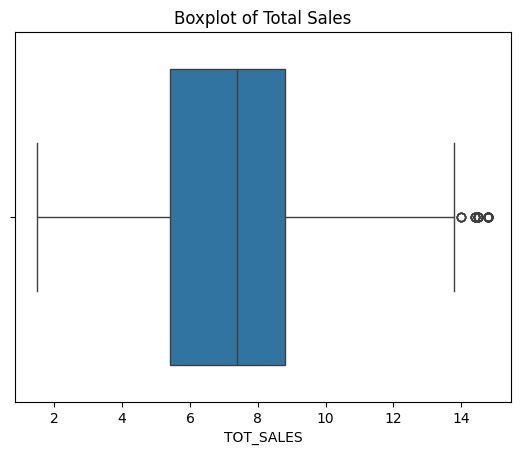

In [91]:
sns.boxplot(x=df_clean['TOT_SALES'])
plt.title('Boxplot of Total Sales')
plt.show()

**EXPLORATORY DATA ANALYSIS**

**UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES**

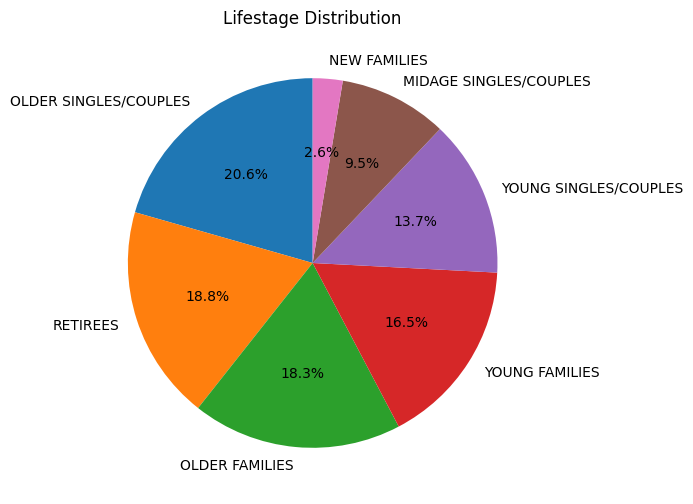

In [92]:
# lifestage visualization
df['LIFESTAGE'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title('Lifestage Distribution')
plt.ylabel('')
plt.show()


**INSIGHTS:**

Older Families dominate the customer base.

Other groups like Young Singles/Couples and New Families form smaller segments.

Targeting Older Families should be a key marketing focus due to their large share.

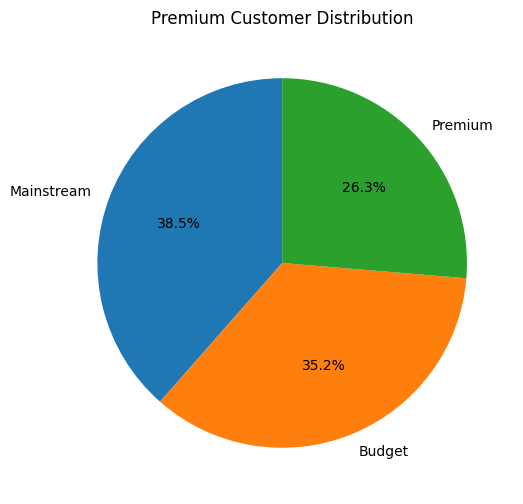

In [93]:
#premium visualization
df['PREMIUM_CUSTOMER'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title("Premium Customer Distribution")
plt.ylabel(' ')
plt.show()

**INSIGHTS:**

Mainstream customers make up the largest segment.

Budget and Premium segments are smaller but fairly equal in size.

Mainstream is the key target for broad marketing efforts.

Understanding Budget and Premium groups can help craft tailored strategies and grow their value.

1. OVERALL SALES

In [94]:
total_sales=df['TOT_SALES'].sum()
total_transactions = df['TXN_ID'].nunique()
total_customers = df['CARD_NBR'].nunique()
print(f"Total Sales:{total_sales}")
print(f"Total Transactions: {total_transactions}")
print(f"Total Unique Customers: {total_customers}")

Total Sales:1934415.0000000002
Total Transactions: 263127
Total Unique Customers: 72637


2. Total Sales Over Year

In [43]:
Yearly_sales = df.groupby('ORDER_YEAR')['TOT_SALES'].sum().reset_index()
Yearly_sales


,ORDER_YEAR,TOT_SALES
0,2018,977091.15
1,2019,957323.85


3. Total Sales Over Month

In [141]:
Monthly_sales = df.groupby('ORDER_MONTH')['TOT_SALES'].sum().reset_index()
Monthly_sales


,ORDER_MONTH,TOT_SALES
0,April,159845.10
1,August,158731.05
2,December,167913.40
3,February,150665.00
4,January,162642.30
5,July,165275.30
6,June,160538.60
7,March,166265.20
8,May,157367.65
9,November,160233.70


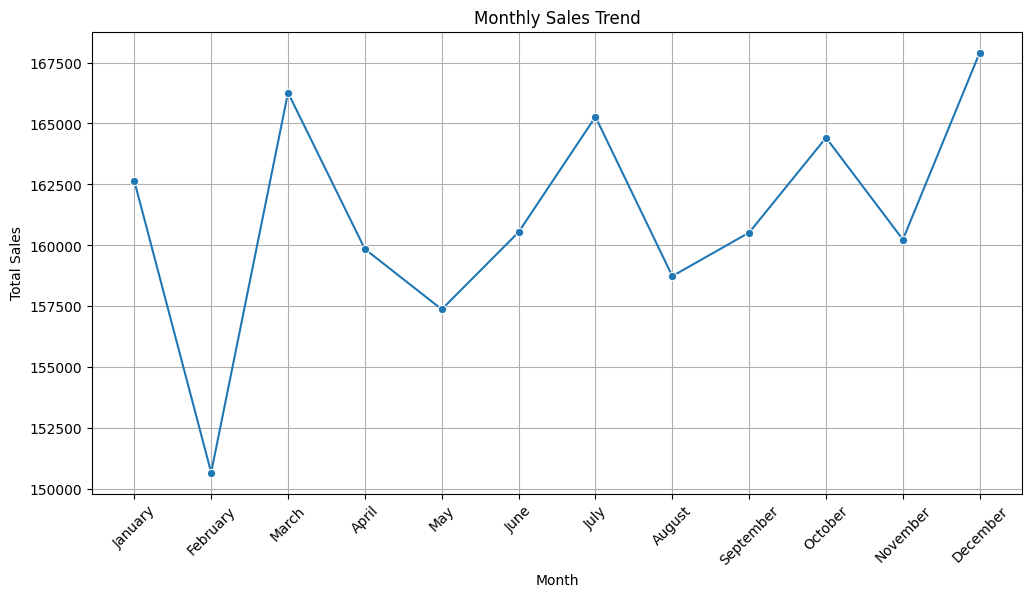

In [143]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
Monthly_sales['ORDER_MONTH'] = pd.Categorical(Monthly_sales['ORDER_MONTH'], categories=month_order, ordered=True)
Monthly_sales = Monthly_sales.sort_values('ORDER_MONTH')

plt.figure(figsize=(12, 6))
sns.lineplot(x='ORDER_MONTH', y='TOT_SALES', data=Monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Insights**

The line plot shows the trend of total sales throughout the year.

Key observations:

- Sales are highest in December.
- Sales are lowest in February.
- There seems to be a peak around the holiday season (November/December).

**5. Sales contribution by chips products**

In [151]:
df['PACK_SIZE'] = df_1['PROD_NAME'].str.extract(r'(\d+)[gG]')
df['PACK_SIZE'] = df_1['PACK_SIZE'].astype(float)
df.head(5)


,ORDER_DATE,STORE_NBR,CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,ORDER_YEAR,ORDER_MONTH,DayOfWeek,PACK_SIZE,Week,Year,YearWeek
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018,October,Wednesday,175.0,42,2018,2018-42
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019,May,Tuesday,175.0,20,2019,2019-20
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,2019,May,Monday,170.0,21,2019,2019-21
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,2018,August,Friday,175.0,33,2018,2018-33
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,2018,August,Saturday,150.0,33,2018,2018-33


In [152]:
top_products = df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
top_products

/tmp/ipython-input-152-1044949763.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)


,TOT_SALES
PROD_NAME,
Dorito Corn Chp Supreme 380g,40352.0
Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
Kettle Mozzarella Basil & Pesto 175g,34457.4
Smiths Crinkle Original 330g,34302.6
Cheezels Cheese 330g,34296.9
Doritos Cheese Supreme 330g,33390.6
Kettle Sweet Chilli And Sour Cream 175g,33031.8
Kettle Original 175g,32740.2


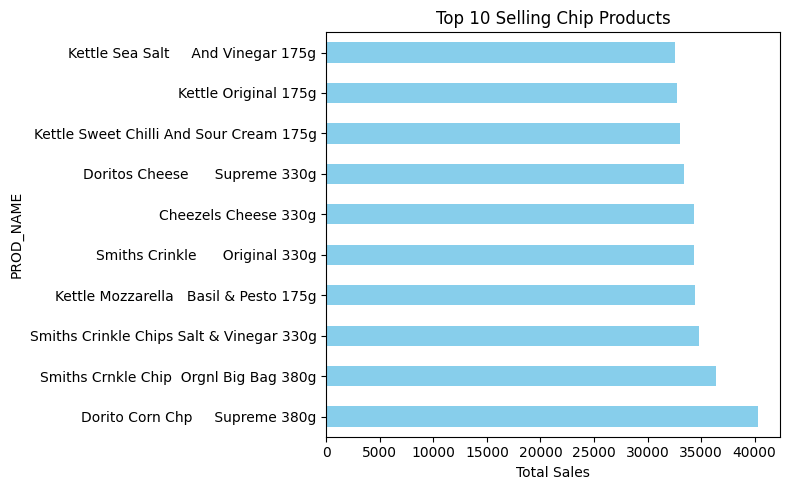

In [59]:
top_products.plot(kind='barh', figsize=(8,5), title='Top 10 Selling Chip Products', color='skyblue')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.savefig('top_chips.png')
plt.show()

**Insights**

Kettle dominates the top 10 list, with multiple flavors among the highest-selling — indicating strong brand preference.

Smiths also performs well, especially with crinkle cut and larger pack sizes (330g–380g).

Doritos appears twice, showing it's also a consistent performer.

Flavors like Original, Cheese Supreme, and Salt & Vinegar are recurring favorites, suggesting classic flavors have broad appeal.

Most top-selling products are 330g–380g packs, implying larger pack sizes drive sales.



**Recommendations**

Prioritize Kettle and Smiths brands in shelf placement and promotions.

Focus marketing on classic flavors like Original, Cheese, and Salt & Vinegar.

Ensure ample stock of larger pack sizes (330g–380g) — they dominate sales.

Consider bundling top flavors or running multi-buy offers to boost volume.

**6. Pack size analysis**

In [156]:
df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)g').astype(float)
df.groupby('PACK_SIZE')['TOT_SALES'].sum()


,TOT_SALES
PACK_SIZE,
70.0,6852.0
90.0,9676.4
110.0,162765.4
125.0,5733.0
134.0,177655.5
135.0,26090.4
150.0,296609.7
160.0,10647.6
165.0,101360.6


/tmp/ipython-input-158-953015961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PACK_SIZE', y='TOT_SALES', data=df, palette='viridis')


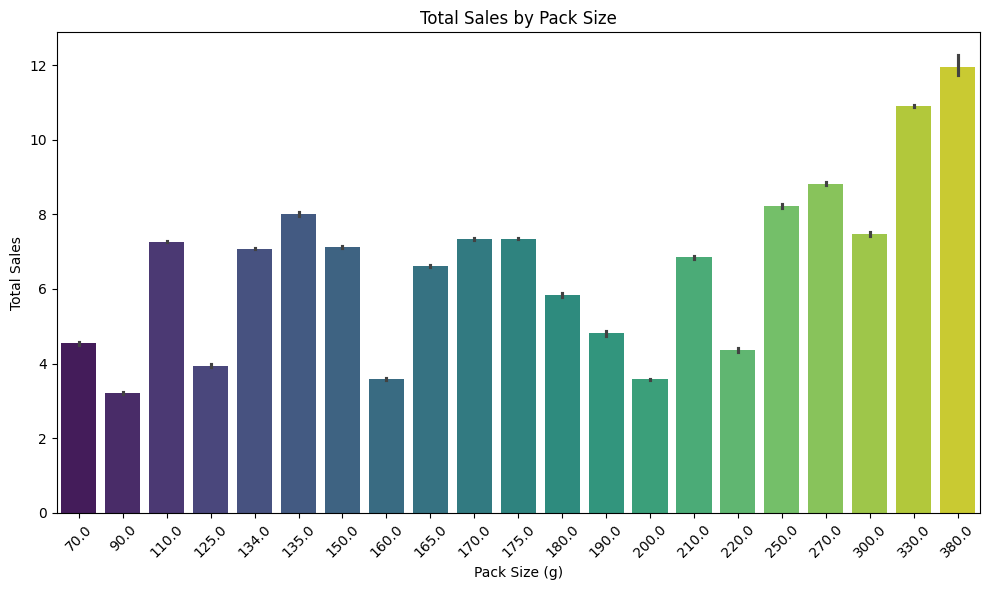

In [158]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PACK_SIZE', y='TOT_SALES', data=df, palette='viridis')
plt.title('Total Sales by Pack Size')
plt.xlabel('Pack Size (g)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights**

Top-Selling Pack Sizes: Certain sizes (e.g., 330g and 380g) dominate sales — these reflect strong customer preference.

Price per Gram Variance: Smaller packs tend to have a higher price per gram, suggesting they are less value-for-money compared to larger packs.

Potential Segment Preference: Larger packs might appeal to families, while smaller ones could suit singles/couples

Product Mix Implications: Focus on expanding popular pack sizes, and re-evaluate underperforming ones.

Promotional Opportunities: Promote larger pack sizes to increase basket size or trial-size packs to attract new buyers.

**Recommendations**

Focus inventory and promotions on top-selling sizes (like 380g).

Consider price adjustments for smaller packs if per gram cost is too high.

Explore segment-based pack preferences to tailor offerings.

Use value messaging for larger packs in campaigns.

**7. Average Spend and Frequency by Segment**

In [137]:
lifestage_avg=df.groupby('LIFESTAGE')['TOT_SALES'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)
lifestage_avg

/tmp/ipython-input-137-520219428.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifestage_avg=df.groupby('LIFESTAGE')['TOT_SALES'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)


,count,sum,mean
LIFESTAGE,,,
OLDER SINGLES/COUPLES,54479,402426.75,7.386823
RETIREES,49763,366470.90,7.364325
OLDER FAMILIES,48596,353767.20,7.279760
YOUNG FAMILIES,43592,316160.10,7.252709
YOUNG SINGLES/COUPLES,36377,260405.30,7.158515
MIDAGE SINGLES/COUPLES,25110,184751.30,7.357678
NEW FAMILIES,6919,50433.45,7.289124


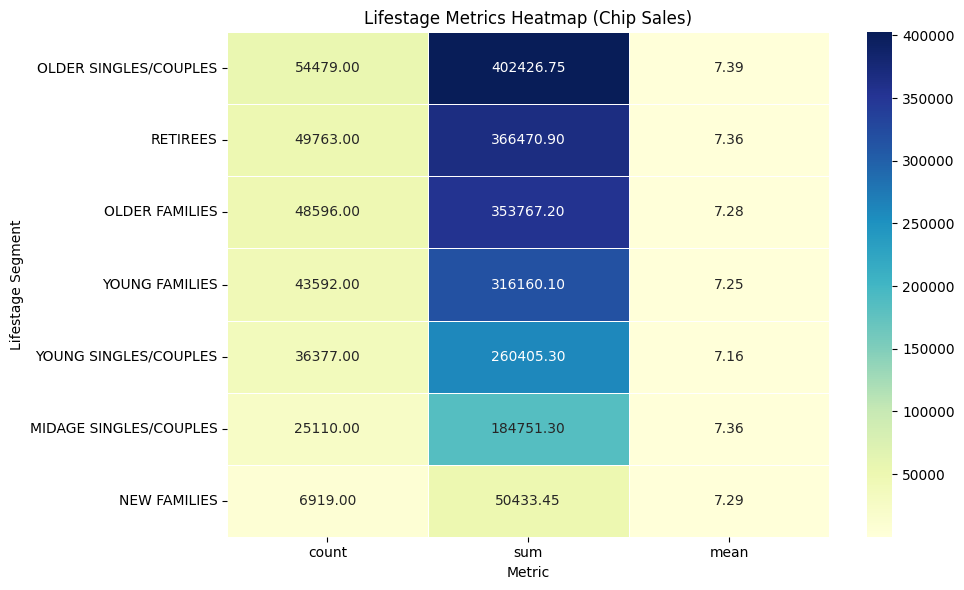

In [138]:
plt.figure(figsize=(10, 6))
sns.heatmap(lifestage_avg, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Lifestage Metrics Heatmap (Chip Sales)')
plt.ylabel('Lifestage Segment')
plt.xlabel('Metric')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insights**

**Top Contributors:**

Older Singles/Couples and Retirees lead in both total sales and transaction count, making them the most valuable customer groups for chip sales.

Older Families also show strong engagement, closely following the top two groups.

**Average Spend:**

Older Singles/Couples, Retirees, and Midage Singles/Couples have the highest average sales per transaction (~$7.36–$7.39).

Young Singles/Couples have the lowest average spend ($7.16), despite a moderate number of purchases.

**Under-engaged Segment:**

New Families have the lowest transaction count and total sales, suggesting this group is currently under-targeted or less interested

**Recommendation:**
Focus on Older Demographics: Target Older Singles/Couples, Retirees, and Older Families with loyalty rewards, value packs, and personalized offers.

**Grow New Families:** Introduce campaigns tailored to New Families — e.g., bundled snack offers, parenting-themed promotions, or kid-friendly products.

**Increase Spend Among Young Customers:**Promote larger pack sizes or cross-promotions (e.g., party snacks) to increase spend per purchase among Young Singles/Couples.

In [134]:
premium_avg=df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)
avg

/tmp/ipython-input-134-996061465.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  premium_avg=df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)


,count,sum,mean
LIFESTAGE,,,
OLDER SINGLES/COUPLES,54479,402426.75,7.386823
RETIREES,49763,366470.90,7.364325
OLDER FAMILIES,48596,353767.20,7.279760
YOUNG FAMILIES,43592,316160.10,7.252709
YOUNG SINGLES/COUPLES,36377,260405.30,7.158515
MIDAGE SINGLES/COUPLES,25110,184751.30,7.357678
NEW FAMILIES,6919,50433.45,7.289124


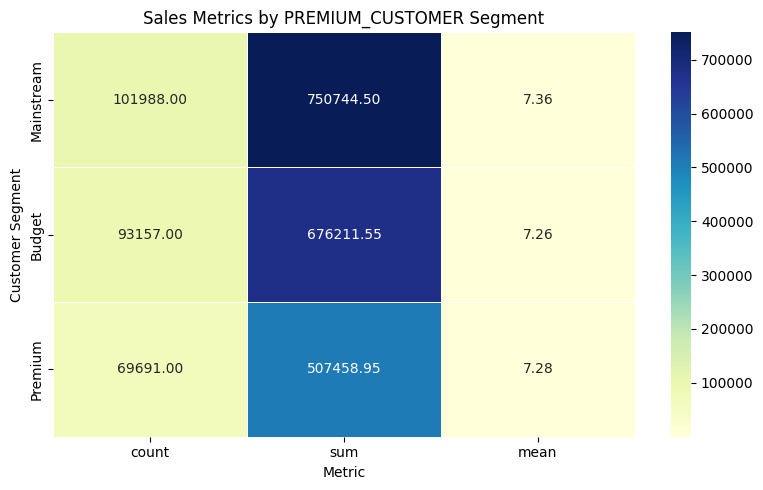

In [135]:
plt.figure(figsize=(8, 5))
sns.heatmap(premium_avg, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Sales Metrics by PREMIUM_CUSTOMER Segment")
plt.xlabel("Metric")
plt.ylabel("Customer Segment")
plt.tight_layout()
plt.show()

**Insights**

Mainstream customers have the highest sales and transaction count – they are the key target segment.

Budget customers buy frequently but spend slightly less per transaction.

Premium customers are fewer but maintain a comparable average spend.

Average spend per transaction is consistent (~$7.30–$7.36) across all segments.

Focus marketing broadly on Mainstream, offer value deals to Budget, and premium offerings to Premium.



**Recommendations**

Prioritize Mainstream segment in campaigns—they drive the bulk of sales.

Offer value bundles or discounts for Budget customers to boost volume.

Introduce premium or health-focused options for Premium customers to increase engagement.